In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('./dataset/dataset_300000.csv', on_bad_lines='skip', header=None, sep=' ', encoding='latin-1')
df.head()

0             1                                                  2  \
0  929840853  1.190146e+09  http://upload.wikimedia.org/wikipedia/en/thumb...   
1  929840856  1.190146e+09         http://en.wikipedia.org/images/wiki-en.png   
2  929840854  1.190146e+09  http://upload.wikimedia.org/wikipedia/commons/...   
3  929840855  1.190146e+09  http://es.wikipedia.org/w/index.php?title=-&ac...   
4  929840857  1.190146e+09  http://en.wikipedia.org/w/index.php?title=Medi...   

   3  
0  -  
1  -  
2  -  
3  -  
4  -

In [3]:
df.shape

(310000, 4)

In [4]:
df.columns = ['monotonic', 'timestamp', 'url', 'flag']

In [5]:
df.head(2)

monotonic     timestamp                                                url  \
0  929840853  1.190146e+09  http://upload.wikimedia.org/wikipedia/en/thumb...   
1  929840856  1.190146e+09         http://en.wikipedia.org/images/wiki-en.png   

  flag  
0    -  
1    -

In [6]:
df.url.value_counts()[:1000]

http://upload.wikimedia.org/wikipedia/en/1/18/Monobook-bullet.png                                                                     4944
http://meta.wikimedia.org/w/index.php?title=MediaWiki:Wikiminiatlas.js&action=raw&ctype=text/javascript&smaxage=21600&maxage=86400    4030
http://en.wikipedia.org/w/index.php?title=MediaWiki:Common.css&usemsgcache=yes&action=raw&ctype=text/css&smaxage=2678400              3655
http://en.wikipedia.org/w/index.php?title=-&action=raw&gen=css&maxage=2678400                                                         3564
http://en.wikipedia.org/w/index.php?title=MediaWiki:Monobook.css&usemsgcache=yes&action=raw&ctype=text/css&smaxage=2678400            3542
                                                                                                                                      ... 
http://upload.wikimedia.org/wikipedia/commons/e/ec/Indice.png                                                                           21
http://en.wikipedia.org/ski

In [7]:
df.duplicated().sum()

0

In [10]:
dataset = df.copy()

In [143]:
# dataset.to_csv('./dataset/wikipedia_310000_line.csv', index=False)

In [11]:
dataset.head()

monotonic     timestamp                                                url  \
0  929840853  1.190146e+09  http://upload.wikimedia.org/wikipedia/en/thumb...   
1  929840856  1.190146e+09         http://en.wikipedia.org/images/wiki-en.png   
2  929840854  1.190146e+09  http://upload.wikimedia.org/wikipedia/commons/...   
3  929840855  1.190146e+09  http://es.wikipedia.org/w/index.php?title=-&ac...   
4  929840857  1.190146e+09  http://en.wikipedia.org/w/index.php?title=Medi...   

  flag  
0    -  
1    -  
2    -  
3    -  
4    -

In [12]:
dataset.dtypes

monotonic      int64
timestamp    float64
url           object
flag          object
dtype: object

In [13]:
dataset.isnull().sum()

monotonic    0
timestamp    0
url          0
flag         0
dtype: int64

In [14]:
dataset.loc[:,'url'] = dataset.url.str.replace('//', '*')

In [15]:
dataset.head()

monotonic     timestamp                                                url  \
0  929840853  1.190146e+09  http:*upload.wikimedia.org/wikipedia/en/thumb/...   
1  929840856  1.190146e+09          http:*en.wikipedia.org/images/wiki-en.png   
2  929840854  1.190146e+09  http:*upload.wikimedia.org/wikipedia/commons/t...   
3  929840855  1.190146e+09  http:*es.wikipedia.org/w/index.php?title=-&act...   
4  929840857  1.190146e+09  http:*en.wikipedia.org/w/index.php?title=Media...   

  flag  
0    -  
1    -  
2    -  
3    -  
4    -

In [16]:
dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']] = dataset.url.str.split('/', expand=True)

In [17]:
dataset.head()

monotonic     timestamp                                                url  \
0  929840853  1.190146e+09  http:*upload.wikimedia.org/wikipedia/en/thumb/...   
1  929840856  1.190146e+09          http:*en.wikipedia.org/images/wiki-en.png   
2  929840854  1.190146e+09  http:*upload.wikimedia.org/wikipedia/commons/t...   
3  929840855  1.190146e+09  http:*es.wikipedia.org/w/index.php?title=-&act...   
4  929840857  1.190146e+09  http:*en.wikipedia.org/w/index.php?title=Media...   

  flag                    prefix_1   prefix_2  \
0    -  http:*upload.wikimedia.org  wikipedia   
1    -      http:*en.wikipedia.org     images   
2    -  http:*upload.wikimedia.org  wikipedia   
3    -      http:*es.wikipedia.org          w   
4    -      http:*en.wikipedia.org          w   

                                            prefix_3             prefix_4  \
0                                                 en                thumb   
1                                        wiki-en.png                 None   
2                                            commons                thumb   
3  index.php?title=-&action=raw&gen=js&useskin=mo...                 None   
4  index.php?title=MediaWiki:Monobook.css&usemsgc...  css&smaxage=2678400   

  prefix_5 prefix_6               prefix_7                        prefix_8  
0        e       e4      James_Johnson.jpg         200px-James_Johnson.jpg  
1     None     None                   None                            None  
2        b       b9  Flag_of_Australia.svg  22px-Flag_of_Australia.svg.png  
3     None     None                   None                            None  
4     None     None                   None                            None

In [18]:
dataset.url = dataset.url.str.replace('*', '//')

In [19]:
dataset.prefix_1 = dataset.prefix_1.str.replace('*', '//')

In [20]:
dataset.head()

monotonic     timestamp                                                url  \
0  929840853  1.190146e+09  http://upload.wikimedia.org/wikipedia/en/thumb...   
1  929840856  1.190146e+09         http://en.wikipedia.org/images/wiki-en.png   
2  929840854  1.190146e+09  http://upload.wikimedia.org/wikipedia/commons/...   
3  929840855  1.190146e+09  http://es.wikipedia.org/w/index.php?title=-&ac...   
4  929840857  1.190146e+09  http://en.wikipedia.org/w/index.php?title=Medi...   

  flag                     prefix_1   prefix_2  \
0    -  http://upload.wikimedia.org  wikipedia   
1    -      http://en.wikipedia.org     images   
2    -  http://upload.wikimedia.org  wikipedia   
3    -      http://es.wikipedia.org          w   
4    -      http://en.wikipedia.org          w   

                                            prefix_3             prefix_4  \
0                                                 en                thumb   
1                                        wiki-en.png                 None   
2                                            commons                thumb   
3  index.php?title=-&action=raw&gen=js&useskin=mo...                 None   
4  index.php?title=MediaWiki:Monobook.css&usemsgc...  css&smaxage=2678400   

  prefix_5 prefix_6               prefix_7                        prefix_8  
0        e       e4      James_Johnson.jpg         200px-James_Johnson.jpg  
1     None     None                   None                            None  
2        b       b9  Flag_of_Australia.svg  22px-Flag_of_Australia.svg.png  
3     None     None                   None                            None  
4     None     None                   None                            None

In [21]:
cek_data = dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']]

In [22]:
cek_data.shape

(310000, 8)

In [23]:
cek_data.dropna(subset=['prefix_1'], inplace=True)

/tmp/ipykernel_443358/2387690799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cek_data.dropna(subset=['prefix_1'], inplace=True)


In [24]:
cek_data['prefix_1'].isnull().sum()

0

In [25]:
cek_data.head()

prefix_1   prefix_2  \
0  http://upload.wikimedia.org  wikipedia   
1      http://en.wikipedia.org     images   
2  http://upload.wikimedia.org  wikipedia   
3      http://es.wikipedia.org          w   
4      http://en.wikipedia.org          w   

                                            prefix_3             prefix_4  \
0                                                 en                thumb   
1                                        wiki-en.png                 None   
2                                            commons                thumb   
3  index.php?title=-&action=raw&gen=js&useskin=mo...                 None   
4  index.php?title=MediaWiki:Monobook.css&usemsgc...  css&smaxage=2678400   

  prefix_5 prefix_6               prefix_7                        prefix_8  
0        e       e4      James_Johnson.jpg         200px-James_Johnson.jpg  
1     None     None                   None                            None  
2        b       b9  Flag_of_Australia.svg  22px-Flag_of_Australia.svg.png  
3     None     None                   None                            None  
4     None     None                   None                            None

In [26]:
cek_data.prefix_2

0         wikipedia
1            images
2         wikipedia
3                 w
4                 w
            ...    
309995    skins-1.5
309996    wikipedia
309997    wikipedia
309998    skins-1.5
309999    skins-1.5
Name: prefix_2, Length: 310000, dtype: object

In [27]:
prefix = list(cek_data.columns)

In [28]:
prefix

['prefix_1',
 'prefix_2',
 'prefix_3',
 'prefix_4',
 'prefix_5',
 'prefix_6',
 'prefix_7',
 'prefix_8']

In [29]:
cek_data.prefix_1.unique()

array(['http://upload.wikimedia.org', 'http://en.wikipedia.org',
       'http://es.wikipedia.org', 'http://pl.wikipedia.org',
       'http://de.wikipedia.org', 'http://en.wiktionary.org',
       'http://pt.wikipedia.org', 'http://hu.wikipedia.org',
       'http://ca.wikipedia.org', 'http://fr.wikipedia.org',
       'http://sv.wikipedia.org', 'http://fi.wikipedia.org',
       'http://it.wikipedia.org', 'http://meta.wikimedia.org',
       'http://www.wikipedia.com', 'http://hi.wikipedia.org',
       'http://ja.wikipedia.org', 'http://en.wikibooks.org',
       'http://www.wikipedia.org', 'http://war.wikipedia.org',
       'http://fr.wiktionary.org', 'http://sk.wikipedia.org',
       'http://no.wikipedia.org', 'http://it.wikiquote.org',
       'http://bn.wikipedia.org', 'http://et.wikipedia.org',
       'http://he.wikipedia.org', 'http://commons.wikimedia.org',
       'http://ar.wikipedia.org', 'http://nl.wikipedia.org',
       'http://de.wiktionary.org', 'http://wikimediafoundation.org',


In [30]:
for i in cek_data:
    print(i)
    print(f'Nama Preifix \n{cek_data[i].unique()[:5]}')
    print(cek_data[i].nunique())
    print()

prefix_1
Nama Preifix 
['http://upload.wikimedia.org' 'http://en.wikipedia.org'
 'http://es.wikipedia.org' 'http://pl.wikipedia.org'
 'http://de.wikipedia.org']
319

prefix_2
Nama Preifix 
['wikipedia' 'images' 'w' 'skins-1.5' 'wiki']
569

prefix_3
Nama Preifix 
['en' 'wiki-en.png' 'commons'
 'index.php?title=-&action=raw&gen=js&useskin=monobook'
 'index.php?title=MediaWiki:Monobook.css&usemsgcache=yes&action=raw&ctype=text']
33901

prefix_4
Nama Preifix 
['thumb' None 'css&smaxage=2678400' 'IE60Fixes.css?99' 'images']
837

prefix_5
Nama Preifix 
['e' None 'b' '4' '9']
467

prefix_6
Nama Preifix 
['e4' None 'b9' '4a' '9a']
12743

prefix_7
Nama Preifix 
['James_Johnson.jpg' None 'Flag_of_Australia.svg' 'Commons-logo.svg'
 'Flag_of_Spain.svg']
50265

prefix_8
Nama Preifix 
['200px-James_Johnson.jpg' None '22px-Flag_of_Australia.svg.png'
 '50px-Commons-logo.svg.png' '20px-Flag_of_Spain.svg.png']
57446



In [32]:
for i in cek_data:
    print(i)
    print(f'Jumlah unique value {cek_data[i].nunique()}')
    print()


prefix_1
Jumlah unique value 319

prefix_2
Jumlah unique value 569

prefix_3
Jumlah unique value 33901

prefix_4
Jumlah unique value 837

prefix_5
Jumlah unique value 467

prefix_6
Jumlah unique value 12743

prefix_7
Jumlah unique value 50265

prefix_8
Jumlah unique value 57446



In [33]:
dic_prefix_1_key = list(cek_data.prefix_1.unique())

In [34]:
dic_prefix_1_key

['http://upload.wikimedia.org',
 'http://en.wikipedia.org',
 'http://es.wikipedia.org',
 'http://pl.wikipedia.org',
 'http://de.wikipedia.org',
 'http://en.wiktionary.org',
 'http://pt.wikipedia.org',
 'http://hu.wikipedia.org',
 'http://ca.wikipedia.org',
 'http://fr.wikipedia.org',
 'http://sv.wikipedia.org',
 'http://fi.wikipedia.org',
 'http://it.wikipedia.org',
 'http://meta.wikimedia.org',
 'http://www.wikipedia.com',
 'http://hi.wikipedia.org',
 'http://ja.wikipedia.org',
 'http://en.wikibooks.org',
 'http://www.wikipedia.org',
 'http://war.wikipedia.org',
 'http://fr.wiktionary.org',
 'http://sk.wikipedia.org',
 'http://no.wikipedia.org',
 'http://it.wikiquote.org',
 'http://bn.wikipedia.org',
 'http://et.wikipedia.org',
 'http://he.wikipedia.org',
 'http://commons.wikimedia.org',
 'http://ar.wikipedia.org',
 'http://nl.wikipedia.org',
 'http://de.wiktionary.org',
 'http://wikimediafoundation.org',
 'http://tr.wikipedia.org',
 'http://en.wikinews.org',
 'http://csb.wikipedia.or

In [35]:
dic_prefix_1_value = list(pd.Series(range(1,173)))

In [36]:
len(dic_prefix_1_key)

319

In [37]:
prefix_1_dictionary = dict(zip(dic_prefix_1_key, dic_prefix_1_value))

In [38]:
prefix_1_dictionary

{'http://upload.wikimedia.org': 1,
 'http://en.wikipedia.org': 2,
 'http://es.wikipedia.org': 3,
 'http://pl.wikipedia.org': 4,
 'http://de.wikipedia.org': 5,
 'http://en.wiktionary.org': 6,
 'http://pt.wikipedia.org': 7,
 'http://hu.wikipedia.org': 8,
 'http://ca.wikipedia.org': 9,
 'http://fr.wikipedia.org': 10,
 'http://sv.wikipedia.org': 11,
 'http://fi.wikipedia.org': 12,
 'http://it.wikipedia.org': 13,
 'http://meta.wikimedia.org': 14,
 'http://www.wikipedia.com': 15,
 'http://hi.wikipedia.org': 16,
 'http://ja.wikipedia.org': 17,
 'http://en.wikibooks.org': 18,
 'http://www.wikipedia.org': 19,
 'http://war.wikipedia.org': 20,
 'http://fr.wiktionary.org': 21,
 'http://sk.wikipedia.org': 22,
 'http://no.wikipedia.org': 23,
 'http://it.wikiquote.org': 24,
 'http://bn.wikipedia.org': 25,
 'http://et.wikipedia.org': 26,
 'http://he.wikipedia.org': 27,
 'http://commons.wikimedia.org': 28,
 'http://ar.wikipedia.org': 29,
 'http://nl.wikipedia.org': 30,
 'http://de.wiktionary.org': 31,


In [39]:
dataset.head()

monotonic     timestamp                                                url  \
0  929840853  1.190146e+09  http://upload.wikimedia.org/wikipedia/en/thumb...   
1  929840856  1.190146e+09         http://en.wikipedia.org/images/wiki-en.png   
2  929840854  1.190146e+09  http://upload.wikimedia.org/wikipedia/commons/...   
3  929840855  1.190146e+09  http://es.wikipedia.org/w/index.php?title=-&ac...   
4  929840857  1.190146e+09  http://en.wikipedia.org/w/index.php?title=Medi...   

  flag                     prefix_1   prefix_2  \
0    -  http://upload.wikimedia.org  wikipedia   
1    -      http://en.wikipedia.org     images   
2    -  http://upload.wikimedia.org  wikipedia   
3    -      http://es.wikipedia.org          w   
4    -      http://en.wikipedia.org          w   

                                            prefix_3             prefix_4  \
0                                                 en                thumb   
1                                        wiki-en.png                 None   
2                                            commons                thumb   
3  index.php?title=-&action=raw&gen=js&useskin=mo...                 None   
4  index.php?title=MediaWiki:Monobook.css&usemsgc...  css&smaxage=2678400   

  prefix_5 prefix_6               prefix_7                        prefix_8  
0        e       e4      James_Johnson.jpg         200px-James_Johnson.jpg  
1     None     None                   None                            None  
2        b       b9  Flag_of_Australia.svg  22px-Flag_of_Australia.svg.png  
3     None     None                   None                            None  
4     None     None                   None                            None

In [40]:
dataset.dropna(subset=['prefix_1'], inplace=True)

In [41]:
dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']] = dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']].fillna(value='*edit*')

In [42]:
dataset.head()

monotonic     timestamp                                                url  \
0  929840853  1.190146e+09  http://upload.wikimedia.org/wikipedia/en/thumb...   
1  929840856  1.190146e+09         http://en.wikipedia.org/images/wiki-en.png   
2  929840854  1.190146e+09  http://upload.wikimedia.org/wikipedia/commons/...   
3  929840855  1.190146e+09  http://es.wikipedia.org/w/index.php?title=-&ac...   
4  929840857  1.190146e+09  http://en.wikipedia.org/w/index.php?title=Medi...   

  flag                     prefix_1   prefix_2  \
0    -  http://upload.wikimedia.org  wikipedia   
1    -      http://en.wikipedia.org     images   
2    -  http://upload.wikimedia.org  wikipedia   
3    -      http://es.wikipedia.org          w   
4    -      http://en.wikipedia.org          w   

                                            prefix_3             prefix_4  \
0                                                 en                thumb   
1                                        wiki-en.png               *edit*   
2                                            commons                thumb   
3  index.php?title=-&action=raw&gen=js&useskin=mo...               *edit*   
4  index.php?title=MediaWiki:Monobook.css&usemsgc...  css&smaxage=2678400   

  prefix_5 prefix_6               prefix_7                        prefix_8  
0        e       e4      James_Johnson.jpg         200px-James_Johnson.jpg  
1   *edit*   *edit*                 *edit*                          *edit*  
2        b       b9  Flag_of_Australia.svg  22px-Flag_of_Australia.svg.png  
3   *edit*   *edit*                 *edit*                          *edit*  
4   *edit*   *edit*                 *edit*                          *edit*

In [43]:
dic_prefix_2_key = list(dataset.prefix_2.unique())

In [44]:
len(dic_prefix_2_key)

570

In [46]:
dic_prefix_2_value = list(pd.Series(range(1,571)))

In [47]:
prefix_2_dictionary = dict(zip(dic_prefix_2_key, dic_prefix_2_value))

In [48]:
print('*edit*' in dataset.prefix_1.values)
print('*edit*' in dataset.prefix_2.values)
print('*edit*' in dataset.prefix_3.values)
print('*edit*' in dataset.prefix_4.values)
print('*edit*' in dataset.prefix_5.values)
print('*edit*' in dataset.prefix_6.values)
print('*edit*' in dataset.prefix_7.values)
print('*edit*' in dataset.prefix_8.values)

False
True
True
True
True
True
True
True


In [49]:
dic_prefix_3_key = list(dataset.prefix_3.unique())

In [50]:
dic_prefix_3_key.remove('*edit*')

In [51]:
len(dic_prefix_3_key)

33901

In [52]:
dic_prfix_3_value = list(pd.Series(range(1, 33902)))

In [53]:
prefix_3_dictionary = dict(zip(dic_prefix_3_key, dic_prfix_3_value))

In [54]:
dic_prefix_4_key = list(dataset.prefix_4.unique())

In [55]:
dic_prefix_4_key.remove('*edit*')

In [56]:
len(dic_prefix_4_key)

837

In [57]:
dic_prefix_4_value = list(pd.Series(range(1,838)))

In [58]:
prefix_4_dictionary = dict(zip(dic_prefix_4_key, dic_prefix_4_value))

In [59]:
dic_prefix_5_key = list(dataset.prefix_5.unique())

In [60]:
dic_prefix_5_key.remove('*edit*')

In [61]:
len(dic_prefix_5_key)

467

In [62]:
dic_prefix_5_value = list(pd.Series(range(1, 468)))

In [63]:
prefix_5_dictionary = dict(zip(dic_prefix_5_key, dic_prefix_5_value))

In [64]:
dic_prefix_6_key = list(dataset.prefix_6.unique())

In [65]:
dic_prefix_6_key.remove('*edit*')

In [66]:
len(dic_prefix_6_key)

12743

In [67]:
dic_prefix_6_value = list(pd.Series(range(1, 12744)))

In [68]:
prefix_6_dictionary = dict(zip(dic_prefix_6_key, dic_prefix_6_value))

In [69]:
dic_prefix_7_key = list(dataset.prefix_7.unique())

In [70]:
dic_prefix_7_key.remove('*edit*')

In [71]:
len(dic_prefix_7_key)

50265

In [72]:
dic_prefix_7_value = list(pd.Series(range(1, 50266)))

In [73]:
prefix_7_dictionary = dict(zip(dic_prefix_7_key, dic_prefix_7_value))

In [74]:
dic_prefix_8_key = list(dataset.prefix_8.unique())

In [75]:
dic_prefix_8_key.remove('*edit*')

In [76]:
len(dic_prefix_8_key)

57446

In [77]:
dic_prefix_8_value = list(pd.Series(range(1, 57447)))

In [78]:
prefix_8_dictionary = dict(zip(dic_prefix_8_key, dic_prefix_8_value))

In [79]:
dataset['prefix_1'] = dataset['prefix_1'].map(prefix_1_dictionary)
dataset['prefix_2'] = dataset['prefix_2'].map(prefix_2_dictionary)
dataset['prefix_3'] = dataset['prefix_3'].map(prefix_3_dictionary)
dataset['prefix_4'] = dataset['prefix_4'].map(prefix_4_dictionary)
dataset['prefix_5'] = dataset['prefix_5'].map(prefix_5_dictionary)
dataset['prefix_6'] = dataset['prefix_6'].map(prefix_6_dictionary)
dataset['prefix_7'] = dataset['prefix_7'].map(prefix_7_dictionary)
dataset['prefix_8'] = dataset['prefix_8'].map(prefix_8_dictionary)

In [80]:
dataset.head()

monotonic     timestamp                                                url  \
0  929840853  1.190146e+09  http://upload.wikimedia.org/wikipedia/en/thumb...   
1  929840856  1.190146e+09         http://en.wikipedia.org/images/wiki-en.png   
2  929840854  1.190146e+09  http://upload.wikimedia.org/wikipedia/commons/...   
3  929840855  1.190146e+09  http://es.wikipedia.org/w/index.php?title=-&ac...   
4  929840857  1.190146e+09  http://en.wikipedia.org/w/index.php?title=Medi...   

  flag  prefix_1  prefix_2  prefix_3  prefix_4  prefix_5  prefix_6  prefix_7  \
0    -       1.0         1       1.0       1.0       1.0       1.0       1.0   
1    -       2.0         2       2.0       NaN       NaN       NaN       NaN   
2    -       1.0         1       3.0       1.0       2.0       2.0       2.0   
3    -       3.0         3       4.0       NaN       NaN       NaN       NaN   
4    -       2.0         3       5.0       2.0       NaN       NaN       NaN   

   prefix_8  
0       1.0  
1       NaN  
2       2.0  
3       NaN  
4       NaN

In [81]:
dataset.prefix_1.dtypes

dtype('float64')

In [82]:
dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']] = dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']].fillna(value=0)

In [83]:
dataset.head()

monotonic     timestamp                                                url  \
0  929840853  1.190146e+09  http://upload.wikimedia.org/wikipedia/en/thumb...   
1  929840856  1.190146e+09         http://en.wikipedia.org/images/wiki-en.png   
2  929840854  1.190146e+09  http://upload.wikimedia.org/wikipedia/commons/...   
3  929840855  1.190146e+09  http://es.wikipedia.org/w/index.php?title=-&ac...   
4  929840857  1.190146e+09  http://en.wikipedia.org/w/index.php?title=Medi...   

  flag  prefix_1  prefix_2  prefix_3  prefix_4  prefix_5  prefix_6  prefix_7  \
0    -       1.0         1       1.0       1.0       1.0       1.0       1.0   
1    -       2.0         2       2.0       0.0       0.0       0.0       0.0   
2    -       1.0         1       3.0       1.0       2.0       2.0       2.0   
3    -       3.0         3       4.0       0.0       0.0       0.0       0.0   
4    -       2.0         3       5.0       2.0       0.0       0.0       0.0   

   prefix_8  
0       1.0  
1       0.0  
2       2.0  
3       0.0  
4       0.0

In [84]:
dataset[['prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']] = dataset[['prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']].astype('int64')

In [85]:
# dataset['prefix_2'] = dataset['prefix_2'].astype(int)

In [86]:
dataset.head()

monotonic     timestamp                                                url  \
0  929840853  1.190146e+09  http://upload.wikimedia.org/wikipedia/en/thumb...   
1  929840856  1.190146e+09         http://en.wikipedia.org/images/wiki-en.png   
2  929840854  1.190146e+09  http://upload.wikimedia.org/wikipedia/commons/...   
3  929840855  1.190146e+09  http://es.wikipedia.org/w/index.php?title=-&ac...   
4  929840857  1.190146e+09  http://en.wikipedia.org/w/index.php?title=Medi...   

  flag  prefix_1  prefix_2  prefix_3  prefix_4  prefix_5  prefix_6  prefix_7  \
0    -       1.0         1         1         1         1         1         1   
1    -       2.0         2         2         0         0         0         0   
2    -       1.0         1         3         1         2         2         2   
3    -       3.0         3         4         0         0         0         0   
4    -       2.0         3         5         2         0         0         0   

   prefix_8  
0         1  
1         0  
2         2  
3         0  
4         0

In [87]:
cek_data = dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']]

In [88]:
cek_data.head(10)

prefix_1  prefix_2  prefix_3  prefix_4  prefix_5  prefix_6  prefix_7  \
0       1.0         1         1         1         1         1         1   
1       2.0         2         2         0         0         0         0   
2       1.0         1         3         1         2         2         2   
3       3.0         3         4         0         0         0         0   
4       2.0         3         5         2         0         0         0   
5       1.0         1         1         1         3         3         3   
6       2.0         4         6         3         0         0         0   
7       1.0         1         3         1         4         4         4   
8       4.0         4         7         4         5         0         0   
9       1.0         1         3         1         6         5         5   

   prefix_8  
0         1  
1         0  
2         2  
3         0  
4         0  
5         3  
6         0  
7         4  
8         0  
9         5

In [89]:
cek_data.tail(10)

prefix_1  prefix_2  prefix_3  prefix_4  prefix_5  prefix_6  prefix_7  \
309990       1.0         1         3         1         7        48      7292   
309991       3.0         4         6         3         0         0         0   
309992       1.0         1         1         1        15       240     50264   
309993       1.0         1         1         1        16       147     50265   
309994       1.0         7        41         7        15     12743         0   
309995       3.0         4         7         4        32         0         0   
309996       1.0         1         3         1         3        75        66   
309997       1.0         1         3         1         1       103      3230   
309998       2.0         4         6        12         0         0         0   
309999       2.0         4         6        22         0         0         0   

        prefix_8  
309990     38520  
309991         0  
309992     57445  
309993     57446  
309994         0  
309995         0  
309996        67  
309997      7878  
309998         0  
309999         0

In [144]:
# cek_data.to_csv('./dataset/data_categorical_310000.txt', index=False, sep=' ', header=None)

In [91]:
dataset.isnull().sum()

monotonic    0
timestamp    0
url          0
flag         0
prefix_1     0
prefix_2     0
prefix_3     0
prefix_4     0
prefix_5     0
prefix_6     0
prefix_7     0
prefix_8     0
dtype: int64

In [92]:
dataset.dtypes

monotonic      int64
timestamp    float64
url           object
flag          object
prefix_1     float64
prefix_2       int64
prefix_3       int64
prefix_4       int64
prefix_5       int64
prefix_6       int64
prefix_7       int64
prefix_8       int64
dtype: object

In [93]:
dataset['count'] = dataset.groupby(by=['url'])['url'].transform('count')

In [94]:
dataset.head()

monotonic     timestamp                                                url  \
0  929840853  1.190146e+09  http://upload.wikimedia.org/wikipedia/en/thumb...   
1  929840856  1.190146e+09         http://en.wikipedia.org/images/wiki-en.png   
2  929840854  1.190146e+09  http://upload.wikimedia.org/wikipedia/commons/...   
3  929840855  1.190146e+09  http://es.wikipedia.org/w/index.php?title=-&ac...   
4  929840857  1.190146e+09  http://en.wikipedia.org/w/index.php?title=Medi...   

  flag  prefix_1  prefix_2  prefix_3  prefix_4  prefix_5  prefix_6  prefix_7  \
0    -       1.0         1         1         1         1         1         1   
1    -       2.0         2         2         0         0         0         0   
2    -       1.0         1         3         1         2         2         2   
3    -       3.0         3         4         0         0         0         0   
4    -       2.0         3         5         2         0         0         0   

   prefix_8  count  
0         1      1  
1         0   2827  
2         2    224  
3         0    431  
4         0   3542

In [95]:
dataset.sort_values(by='count', ascending=False)

monotonic     timestamp  \
210980  930051833  1.190146e+09   
137982  929978833  1.190146e+09   
262693  930103548  1.190146e+09   
108524  929949376  1.190146e+09   
85531   929926384  1.190146e+09   
...           ...           ...   
53729   929894582  1.190146e+09   
215679  930056531  1.190146e+09   
215678  930056529  1.190146e+09   
53730   929894583  1.190146e+09   
0       929840853  1.190146e+09   

                                                      url flag  prefix_1  \
210980  http://upload.wikimedia.org/wikipedia/en/1/18/...    -       1.0   
137982  http://upload.wikimedia.org/wikipedia/en/1/18/...    -       1.0   
262693  http://upload.wikimedia.org/wikipedia/en/1/18/...    -       1.0   
108524  http://upload.wikimedia.org/wikipedia/en/1/18/...    -       1.0   
85531   http://upload.wikimedia.org/wikipedia/en/1/18/...    -       1.0   
...                                                   ...  ...       ...   
53729   http://upload.wikimedia.org/wikipedia/commons/...    -       1.0   
215679  http://upload.wikimedia.org/wikipedia/commons/...    -       1.0   
215678  http://upload.wikimedia.org/wikipedia/commons/...    -       1.0   
53730   http://upload.wikimedia.org/wikipedia/ru/thumb...    -       1.0   
0       http://upload.wikimedia.org/wikipedia/en/thumb...    -       1.0   

        prefix_2  prefix_3  prefix_4  prefix_5  prefix_6  prefix_7  prefix_8  \
210980         1         1        16        22        34         0         0   
137982         1         1        16        22        34         0         0   
262693         1         1        16        22        34         0         0   
108524         1         1        16        22        34         0         0   
85531          1         1        16        22        34         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
53729          1         3         1        15       151      2123     12443   
215679         1         3         1         3       135     37348     42220   
215678         1         3         1        24       465     37347     42219   
53730          1       790         1        24       288     11134     12444   
0              1         1         1         1         1         1         1   

        count  
210980   4944  
137982   4944  
262693   4944  
108524   4944  
85531    4944  
...       ...  
53729       1  
215679      1  
215678      1  
53730       1  
0           1  

[310000 rows x 13 columns]

In [96]:
dataset.drop(columns=['monotonic', 'timestamp', 'flag'], axis=1 , inplace=True)

In [97]:
dataset.head()

url  prefix_1  prefix_2  \
0  http://upload.wikimedia.org/wikipedia/en/thumb...       1.0         1   
1         http://en.wikipedia.org/images/wiki-en.png       2.0         2   
2  http://upload.wikimedia.org/wikipedia/commons/...       1.0         1   
3  http://es.wikipedia.org/w/index.php?title=-&ac...       3.0         3   
4  http://en.wikipedia.org/w/index.php?title=Medi...       2.0         3   

   prefix_3  prefix_4  prefix_5  prefix_6  prefix_7  prefix_8  count  
0         1         1         1         1         1         1      1  
1         2         0         0         0         0         0   2827  
2         3         1         2         2         2         2    224  
3         4         0         0         0         0         0    431  
4         5         2         0         0         0         0   3542

In [98]:
dataset.duplicated().sum()

200934

In [99]:
len(dataset)

310000

In [100]:
dataset.rename(columns={'count': 'popularity'}, inplace=True)

In [101]:
dataset

url  prefix_1  prefix_2  \
0       http://upload.wikimedia.org/wikipedia/en/thumb...       1.0         1   
1              http://en.wikipedia.org/images/wiki-en.png       2.0         2   
2       http://upload.wikimedia.org/wikipedia/commons/...       1.0         1   
3       http://es.wikipedia.org/w/index.php?title=-&ac...       3.0         3   
4       http://en.wikipedia.org/w/index.php?title=Medi...       2.0         3   
...                                                   ...       ...       ...   
309995  http://es.wikipedia.org/skins-1.5/common/image...       3.0         4   
309996  http://upload.wikimedia.org/wikipedia/commons/...       1.0         1   
309997  http://upload.wikimedia.org/wikipedia/commons/...       1.0         1   
309998  http://en.wikipedia.org/skins-1.5/monobook/ext...       2.0         4   
309999  http://en.wikipedia.org/skins-1.5/monobook/bul...       2.0         4   

        prefix_3  prefix_4  prefix_5  prefix_6  prefix_7  prefix_8  popularity  
0              1         1         1         1         1         1           1  
1              2         0         0         0         0         0        2827  
2              3         1         2         2         2         2         224  
3              4         0         0         0         0         0         431  
4              5         2         0         0         0         0        3542  
...          ...       ...       ...       ...       ...       ...         ...  
309995         7         4        32         0         0         0          51  
309996         3         1         3        75        66        67         246  
309997         3         1         1       103      3230      7878          19  
309998         6        12         0         0         0         0        2154  
309999         6        22         0         0         0         0        2343  

[310000 rows x 10 columns]

In [102]:
dataset.popularity.max()

4944

In [103]:
dataset.drop_duplicates(inplace=True)

In [104]:
dataset.duplicated().sum()

0

In [105]:
dataset.sort_values(by='popularity', ascending=False)[:20]

url  prefix_1  prefix_2  \
86   http://upload.wikimedia.org/wikipedia/en/1/18/...       1.0         1   
78   http://meta.wikimedia.org/w/index.php?title=Me...      14.0         3   
46   http://en.wikipedia.org/w/index.php?title=Medi...       2.0         3   
101  http://en.wikipedia.org/w/index.php?title=-&ac...       2.0         3   
4    http://en.wikipedia.org/w/index.php?title=Medi...       2.0         3   
127  http://en.wikipedia.org/w/index.php?title=-&ac...       2.0         3   
1           http://en.wikipedia.org/images/wiki-en.png       2.0         2   
132  http://en.wikipedia.org/skins-1.5/common/wikib...       2.0         4   
59   http://en.wikipedia.org/skins-1.5/monobook/mai...       2.0         4   
41   http://en.wikipedia.org/skins-1.5/common/ajax....       2.0         4   
157  http://en.wikipedia.org/skins-1.5/common/commo...       2.0         4   
35   http://en.wikipedia.org/skins-1.5/common/share...       2.0         4   
87   http://en.wikipedia.org/skins-1.5/common/image...       2.0         4   
100  http://en.wikipedia.org/skins-1.5/monobook/bul...       2.0         4   
16   http://en.wikipedia.org/skins-1.5/monobook/hea...       2.0         4   
196  http://en.wikipedia.org/images/wikimedia-butto...       2.0         2   
44       http://en.wikipedia.org/w/opensearch_desc.php       2.0         3   
88   http://en.wikipedia.org/skins-1.5/monobook/use...       2.0         4   
172  http://en.wikipedia.org/skins-1.5/monobook/ext...       2.0         4   
575                http://en.wikipedia.org/favicon.ico       2.0         6   

     prefix_3  prefix_4  prefix_5  prefix_6  prefix_7  prefix_8  popularity  
86          1        16        22        34         0         0        4944  
78         22        19         0         0         0         0        4030  
46         13         2         0         0         0         0        3655  
101        12         0         0         0         0         0        3564  
4           5         2         0         0         0         0        3542  
127         4         0         0         0         0         0        3333  
1           2         0         0         0         0         0        2827  
132         7        24         0         0         0         0        2740  
59          6         9         0         0         0         0        2726  
41          7        10         0         0         0         0        2650  
157         7         5         0         0         0         0        2642  
35          7        11         0         0         0         0        2628  
87          7         4         5         0         0         0        2382  
100         6        22         0         0         0         0        2343  
16          6         8         0         0         0         0        2335  
196        39         0         0         0         0         0        2320  
44         15         0         0         0         0         0        2305  
88          6        13         0         0         0         0        2268  
172         6        12         0         0         0         0        2154  
575         0         0         0         0         0         0        1743

In [106]:
dataset[dataset['popularity'] >= 50].sort_values(by='popularity', ascending=False)

url  prefix_1  prefix_2  \
86     http://upload.wikimedia.org/wikipedia/en/1/18/...       1.0         1   
78     http://meta.wikimedia.org/w/index.php?title=Me...      14.0         3   
46     http://en.wikipedia.org/w/index.php?title=Medi...       2.0         3   
101    http://en.wikipedia.org/w/index.php?title=-&ac...       2.0         3   
4      http://en.wikipedia.org/w/index.php?title=Medi...       2.0         3   
...                                                  ...       ...       ...   
4714   http://upload.wikimedia.org/wikipedia/commons/...       1.0         1   
5515   http://sv.wikipedia.org/w/index.php?title=-&ac...      11.0         3   
9052   http://upload.wikimedia.org/wikipedia/commons/...       1.0         1   
21461      http://pl.wikipedia.org/w/opensearch_desc.php       4.0         3   
2677   http://upload.wikimedia.org/wikipedia/en/thumb...       1.0         1   

       prefix_3  prefix_4  prefix_5  prefix_6  prefix_7  prefix_8  popularity  
86            1        16        22        34         0         0        4944  
78           22        19         0         0         0         0        4030  
46           13         2         0         0         0         0        3655  
101          12         0         0         0         0         0        3564  
4             5         2         0         0         0         0        3542  
...         ...       ...       ...       ...       ...       ...         ...  
4714          3         1         7       357       902      1360          50  
5515          4         0         0         0         0         0          50  
9052          3         1        12        76      1742      2518          50  
21461        15         0         0         0         0         0          50  
2677          1         1        16        81        72       815          50  

[494 rows x 10 columns]

In [107]:
len(dataset)

109066

In [108]:
len(dataset[dataset['popularity'] > 5])

2584

In [109]:
dataset['popularity'] = dataset['popularity'].apply(lambda x: 1 if x >= 5 else 0)

In [110]:
dataset.head()

url  prefix_1  prefix_2  \
0  http://upload.wikimedia.org/wikipedia/en/thumb...       1.0         1   
1         http://en.wikipedia.org/images/wiki-en.png       2.0         2   
2  http://upload.wikimedia.org/wikipedia/commons/...       1.0         1   
3  http://es.wikipedia.org/w/index.php?title=-&ac...       3.0         3   
4  http://en.wikipedia.org/w/index.php?title=Medi...       2.0         3   

   prefix_3  prefix_4  prefix_5  prefix_6  prefix_7  prefix_8  popularity  
0         1         1         1         1         1         1           0  
1         2         0         0         0         0         0           1  
2         3         1         2         2         2         2           1  
3         4         0         0         0         0         0           1  
4         5         2         0         0         0         0           1

In [111]:
dataset.popularity.value_counts().to_frame()

popularity
0      105966
1        3100

In [145]:
# dataset.to_csv('./dataset/prefix_wikipedia_310000.csv', index=False)

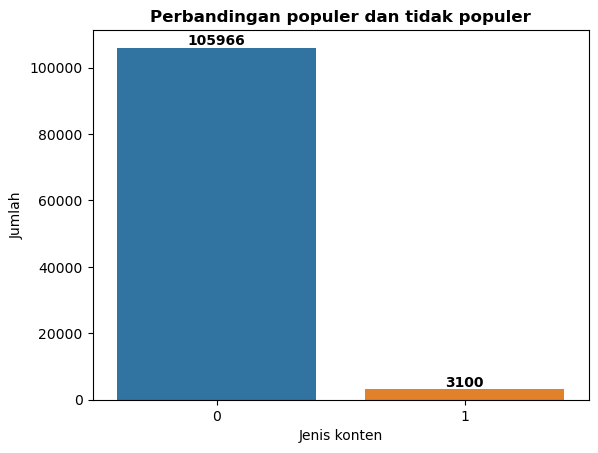

In [113]:
ax = sns.countplot(x=dataset['popularity'])

ax.bar_label(ax.containers[0], fontweight='bold')

plt.title('Perbandingan populer dan tidak populer', fontweight='bold')
plt.xlabel('Jenis konten')
plt.ylabel('Jumlah')

plt.show()

In [114]:
dataset = dataset.drop(columns='url', axis=1)

In [115]:
dataset

prefix_1  prefix_2  prefix_3  prefix_4  prefix_5  prefix_6  prefix_7  \
0            1.0         1         1         1         1         1         1   
1            2.0         2         2         0         0         0         0   
2            1.0         1         3         1         2         2         2   
3            3.0         3         4         0         0         0         0   
4            2.0         3         5         2         0         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
309985       1.0         1        27         1        15       151     50262   
309988       1.0         1         3         1        24        63     50263   
309992       1.0         1         1         1        15       240     50264   
309993       1.0         1         1         1        16       147     50265   
309994       1.0         7        41         7        15     12743         0   

        prefix_8  popularity  
0              1           0  
1              0           1  
2              2           1  
3              0           1  
4              0           1  
...          ...         ...  
309985     57443           0  
309988     57444           0  
309992     57445           0  
309993     57446           0  
309994         0           0  

[109066 rows x 9 columns]

In [116]:
X = dataset.drop('popularity', axis=1)
y = dataset['popularity']

In [117]:
X

prefix_1  prefix_2  prefix_3  prefix_4  prefix_5  prefix_6  prefix_7  \
0            1.0         1         1         1         1         1         1   
1            2.0         2         2         0         0         0         0   
2            1.0         1         3         1         2         2         2   
3            3.0         3         4         0         0         0         0   
4            2.0         3         5         2         0         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
309985       1.0         1        27         1        15       151     50262   
309988       1.0         1         3         1        24        63     50263   
309992       1.0         1         1         1        15       240     50264   
309993       1.0         1         1         1        16       147     50265   
309994       1.0         7        41         7        15     12743         0   

        prefix_8  
0              1  
1              0  
2              2  
3              0  
4              0  
...          ...  
309985     57443  
309988     57444  
309992     57445  
309993     57446  
309994         0  

[109066 rows x 8 columns]

In [118]:
y

0         0
1         1
2         1
3         1
4         1
         ..
309985    0
309988    0
309992    0
309993    0
309994    0
Name: popularity, Length: 109066, dtype: int64

In [119]:
# !pip3 install -U scikit-learn scipy matplotlib

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [122]:
from collections import Counter
print(f'Before Oversampling: {Counter(y_train)} ')

Before Oversampling: Counter({0: 84735, 1: 2517}) 


In [123]:
# !pip3 install imbalanced-learn --upgrade

In [124]:
from imblearn.over_sampling import SMOTE


In [125]:
smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [126]:
print(f'After Oversampling: {Counter(y_train_smote)}')

After Oversampling: Counter({0: 84735, 1: 84735})


In [127]:
y_train_smote.value_counts()

0    84735
1    84735
Name: popularity, dtype: int64

Text(0, 0.5, 'Jumlah')

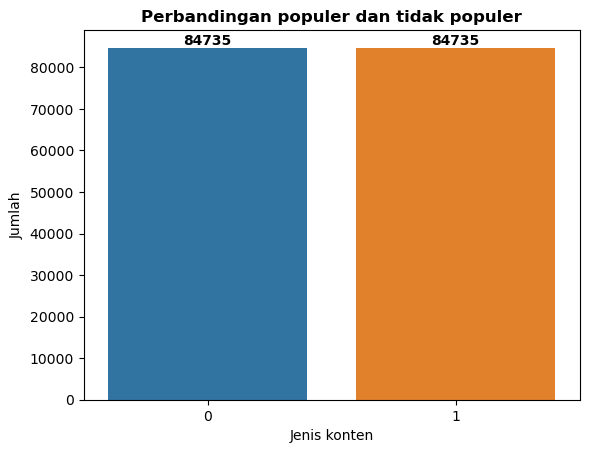

In [128]:
ax = sns.countplot(x=y_train_smote)

ax.bar_label(ax.containers[0], fontweight='bold')

plt.title('Perbandingan populer dan tidak populer', fontweight='bold')
plt.xlabel('Jenis konten')
plt.ylabel('Jumlah')

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)

knn = KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote)

svc = SVC()
svc.fit(X_train_smote, y_train_smote)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_smote, y_train_smote)

rfc = RandomForestClassifier()
rfc.fit(X_train_smote, y_train_smote)

gbc = GradientBoostingClassifier()
gbc.fit(X_train_smote, y_train_smote)

/home/lutfianto/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier()

In [130]:
y_pred1 = lr.predict(X_test)
y_pred2 = knn.predict(X_test)
y_pred3 = svc.predict(X_test)
y_pred4 = dtc.predict(X_test)
y_pred5 = rfc.predict(X_test)
y_pred6 = gbc.predict(X_test)

In [131]:
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score

print(f'ROC AUC for Logistic Regression {roc_auc_score(y_test, y_pred1)}')
print(f'ROC AUC for KNeighbors Classifier {roc_auc_score(y_test, y_pred2)}')
print(f'ROC AUC for SVC {roc_auc_score(y_test, y_pred3)}')
print(f'ROC AUC for Decision Tree Classifier {roc_auc_score(y_test, y_pred4)}')
print(f'ROC AUC for Random Forest Classifier {roc_auc_score(y_test, y_pred5)}')
print(f'ROC AUC for Gradient Boosting Classifier {roc_auc_score(y_test, y_pred6)}')

ROC AUC for Logistic Regression 0.8106752779783405
ROC AUC for KNeighbors Classifier 0.8114229952592866
ROC AUC for SVC 0.8621314361754426
ROC AUC for Decision Tree Classifier 0.7395917229353207
ROC AUC for Random Forest Classifier 0.7661587117384665
ROC AUC for Gradient Boosting Classifier 0.8803398263954784


In [132]:
print(f'ACC for Logistic Regression {accuracy_score(y_test, y_pred1)}')
print(f'ACC for KNeighbors Classifier {accuracy_score(y_test, y_pred2)}')
print(f'ACC for SVC {accuracy_score(y_test, y_pred3)}')
print(f'ACC for Decision Tree Classifier {accuracy_score(y_test, y_pred4)}')
print(f'ACC for Random Forest Classifier {accuracy_score(y_test, y_pred5)}')
print(f'ACC for Gradient Boosting Classifier {accuracy_score(y_test, y_pred6)}')

ACC for Logistic Regression 0.8928669661685157
ACC for KNeighbors Classifier 0.8991931786925828
ACC for SVC 0.8257999449894563
ACC for Decision Tree Classifier 0.9428348766846979
ACC for Random Forest Classifier 0.9474649307783992
ACC for Gradient Boosting Classifier 0.8839735949390299


In [133]:
ex1 = lr.predict([[2, 5, 336, 0, 0, 0, 0, 0]])

/home/lutfianto/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [135]:
if ex1 == 1:
    print('populer')
else:
    print('unpopuler')

unpopuler


In [136]:
ex2 = knn.predict([[2, 5, 336, 0, 0, 0, 0, 0]])
ex3 = svc.predict([[2, 5, 336, 0, 0, 0, 0, 0]])
ex4 = dtc.predict([[2, 5, 336, 0, 0, 0, 0, 0]])
ex5 = rfc.predict([[2, 5, 336, 0, 0, 0, 0, 0]])
ex6 = gbc.predict([[2, 5, 336, 0, 0, 0, 0, 0]])

/home/lutfianto/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/lutfianto/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/lutfianto/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/lutfianto/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/lutfianto/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoosting

In [137]:
print(ex2)
print(ex3)
print(ex4)
print(ex5)
print(ex6)

[0]
[1]
[0]
[0]
[0]


In [138]:
result = pd.DataFrame({'Models': ['LR', 'KNN', 'SVC', 'DTC', 'RFC', 'GBC'],
                      'AUC': [roc_auc_score(y_test, y_pred1) * 100,
                             roc_auc_score(y_test, y_pred2) * 100,
                             roc_auc_score(y_test, y_pred3) * 100,
                             roc_auc_score(y_test, y_pred4) * 100,
                             roc_auc_score(y_test, y_pred5) * 100,
                             roc_auc_score(y_test, y_pred6) * 100],
                      'ACC': [accuracy_score(y_test, y_pred1) * 100,
                             accuracy_score(y_test, y_pred2) * 100,
                             accuracy_score(y_test, y_pred3) * 100,
                             accuracy_score(y_test, y_pred4) * 100,
                             accuracy_score(y_test, y_pred5) * 100,
                             accuracy_score(y_test, y_pred6) * 100]})

In [139]:
result

Models        AUC        ACC
0     LR  81.067528  89.286697
1    KNN  81.142300  89.919318
2    SVC  86.213144  82.579994
3    DTC  73.959172  94.283488
4    RFC  76.615871  94.746493
5    GBC  88.033983  88.397359

In [140]:
result.sort_values(by='AUC', ascending=False).index

Int64Index([5, 2, 1, 0, 4, 3], dtype='int64')

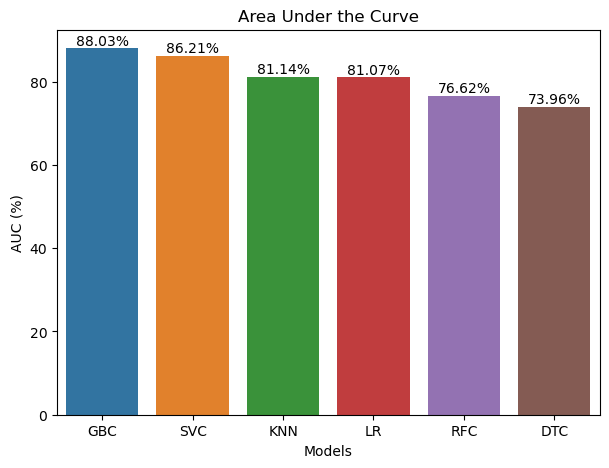

In [141]:
plt.figure(figsize=(7, 5))

ax = sns.barplot(x=result['Models'], y=result['AUC'], order=result.sort_values(by='AUC', ascending=False).Models)

ax.bar_label(ax.containers[0], fmt='%.2f%%')

plt.title('Area Under the Curve')
plt.ylabel('AUC (%)')

plt.show()

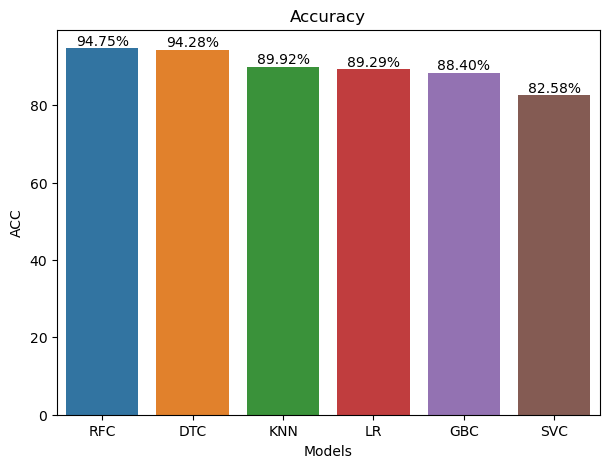

In [142]:
plt.figure(figsize=(7, 5))

ax = sns.barplot(x=result['Models'], y=result['ACC'], order=result.sort_values(by='ACC', ascending=False).Models)
ax.bar_label(ax.containers[0], fmt='%.2f%%')

plt.title('Accuracy')

plt.show()

In [147]:
import joblib

In [148]:
# joblib.dump(lr, 'wikipedia_classification_310000')

['wikipedia_classification_310000']

In [428]:
model_lr = joblib.load('./wikipedia_classification')

In [429]:
model_lr.predict([[2, 5, 336, 0, 0, 0, 0, 0]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)